# K-Means Clustering


## What is K-Means?
K-Means is an unsupervised machine learning algorithm used to group data into **clusters** based on their similarity.

## Key Concepts
- **Clusters:** Groups of similar data points.
- **Centroid:** The center point of each cluster.
- **WCSS (Within-Cluster-Sum-of-Squares):** Measures the compactness of clusters.

## Steps in K-Means
1. Initialize the number of clusters \(k\).
2. Randomly assign cluster centroids.
3. Assign each data point to the nearest centroid.
4. Update centroids by calculating the mean of assigned points.
5. Repeat until cluster assignments no longer change.

## Choosing the Optimal Number of Clusters
- Use the **Elbow Method**: Plot WCSS vs. number of clusters and choose the "elbow" point.

## Applications of K-Means
- Customer segmentation
- Image compression
- Document clustering
- Pattern recognition


# Importing the necessary libraries

In [17]:
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import pandas as pd  # For data manipulation
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing the dataset
# The dataset contains information about customers' annual income and spending score
dataset = pd.read_csv(r"D:\FSDS Material\Dataset\Clustering\Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values  # Selecting columns 'Annual Income' and 'Spending Score'

In [47]:
dataset.shape

(200, 5)

In [21]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [23]:
# Using the Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans  # Importing the K-Means clustering model

In [33]:
# List to store the Within-Cluster-Sum-of-Squares (WCSS) for different cluster numbers
wcss = []

In [41]:
# Check WCSS
print("WCSS values:", wcss)

WCSS values: []


In [43]:
# Iterating over a range of cluster counts (1 to 10) to compute WCSS
for i in range(1, 11):
    # Initializing K-Means with `i` clusters
    # `init='k-means++'` ensures efficient cluster centroid initialization
    # `random_state=0` ensures reproducibility
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(X)  # Fitting K-Means to the dataset
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS value for the current model

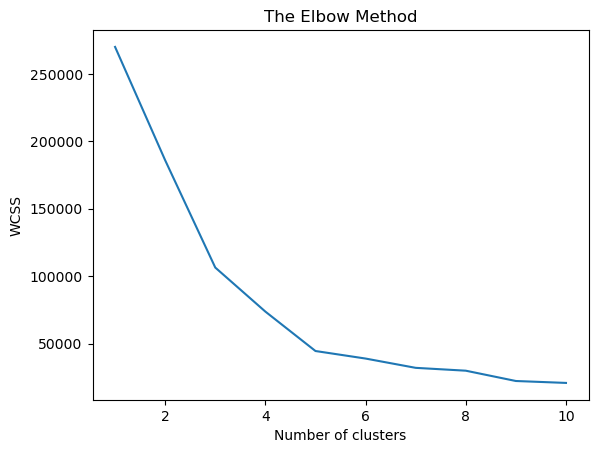

In [45]:
# Plotting the Elbow Curve
plt.plot(range(1, 11), wcss)  # Number of clusters vs. WCSS
plt.title('The Elbow Method')  # Title for the plot
plt.xlabel('Number of clusters')  # X-axis label
plt.ylabel('WCSS')  # Y-axis label
plt.show()  # Display the plot

# Explanation:
# The "Elbow Method" involves plotting WCSS against the number of clusters.
# The optimal number of clusters is at the "elbow" point, where WCSS starts decreasing at a slower rate.

In [53]:
# Training the K-Means model on the dataset with the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)  # 5 clusters
y_kmeans = kmeans.fit_predict(X)  # Predicting the cluster for each data point

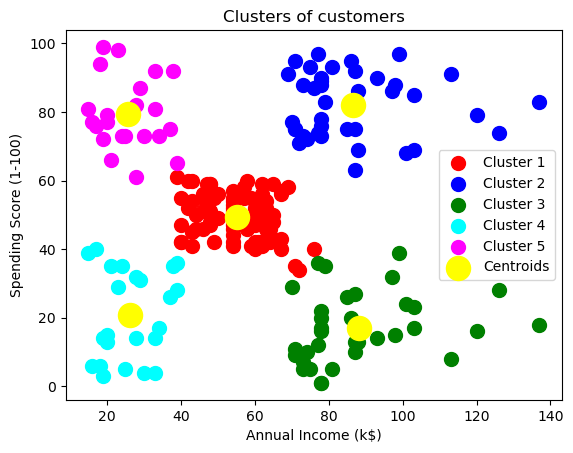

In [65]:
# Visualizing the clusters
# Scatter plots for each cluster, identified by `y_kmeans`
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')  # Cluster 1
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')  # Cluster 2
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')  # Cluster 3
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')  # Cluster 4
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')  # Cluster 5

# Highlighting the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids')  # Centroids of the clusters

# Adding titles and labels
plt.title('Clusters of customers')  # Plot title
plt.xlabel('Annual Income (k$)')  # X-axis label
plt.ylabel('Spending Score (1-100)')  # Y-axis label
plt.legend()  # Legend to identify clusters and centroids
plt.show()  # Display the visualization

# Explanation:
- Each cluster is represented by a different color.
- The centroids are marked in yellow and represent the central point of each cluster.
- Clustering helps to segment customers based on their spending behavior and income.